Imports
Data Loading- Load both data sets and explore them then concat them
Add a description of the data
 and exploration - info, columns, 







# Performance Metric
Performance will be evaluated according to the area under the receiver operating characteristic curve (ROC AUC) for each of the two target variables. The mean of these two scores will be the overall score. A higher value indicates stronger performance.

In Python, you can calculate this using sklearn.metrics.roc_auc_score for this multilabel setup with the default average="macro" parameter.

# Submission Format
The format for the submission file is three columns: respondent_id, h1n1_vaccine, and seasonal_vaccine. The predictions for the two target variables should be float probabilities that range between 0.0 and 1.0. Because the competition uses ROC AUC as its evaluation metric, the values you submit must be the probabilities that a person received each vaccine, not binary labels.

As this is a multilabel problem, the probabilities for each row do not need to sum to one.

In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [4]:
features_df = pd.read_csv("data/training_set_features.csv", index_col="respondent_id")
labels_df = pd.read_csv("data/training_set_labels.csv", index_col="respondent_id")

In [5]:
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


There are 26707 rows and 35 columns. Each row is a respondent.

Let's look at the columns

In [6]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

- `h1n1_concern` - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- `h1n1_knowledge` - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
- `behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
- `behavioral_face_mask` - Has bought a face mask. (binary)
- `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
- `behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
- `behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
- `behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
- `doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)
- `doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)
- `chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
- `health_worker` - Is a healthcare worker. (binary)
- `health_insurance` - Has health insurance. (binary)
- `opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- `opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- `opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- `opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- `opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- `age_group` - Age group of respondent.
- `education` - Self-reported education level.
- `race` - Race of respondent.
- `sex` - Sex of respondent.
- `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- `marital_status` - Marital status of respondent.
- `rent_or_own` - Housing situation of respondent.
- `employment_status` - Employment status of respondent.
- `hhs_geo_region` - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- `household_adults` - Number of other adults in household, top-coded to 3.
- `household_children` - Number of children in household, top-coded to 3.
- `employment_industry` - Type of industry respondent is employed in. Values are represented as short random character strings.
- `employment_occupation` - Type of occupation of respondent. Values are represented as short random character strings.

In [7]:
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


The number of rows is similar (26707), with 2 columns, one for H1N1 vaccine, and the other for seasonal vaccine. Each row is a respondent.

Let's double-check that the rows between the features and the labels match up. We don't want to have the wrong labels. Numpy's `assert_array_equal` will error if the two arrays—the row indices of the two data frames—don't match up.

In [8]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

The assertion ran, and nothing happened. That's good, it means there is no problem. If the two index arrays were not the same, there would be an error.

Let's concat both dataframes to have one uniform training dataset

In [9]:
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


# Labels Exploration

Let's explore the labels and see their distribution

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print("H1N1 Vaccine Value Counts:")
print(joined_df['h1n1_vaccine'].value_counts())
print( )
print("Seasonal Vaccine Value Counts:")
print(joined_df['seasonal_vaccine'].value_counts())

H1N1 Vaccine Value Counts:
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

Seasonal Vaccine Value Counts:
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


Text(0.5, 1.0, 'Proportion of Seasonal Vaccine')

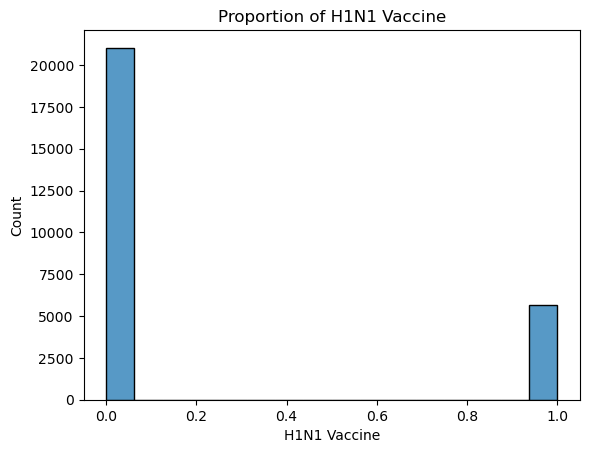

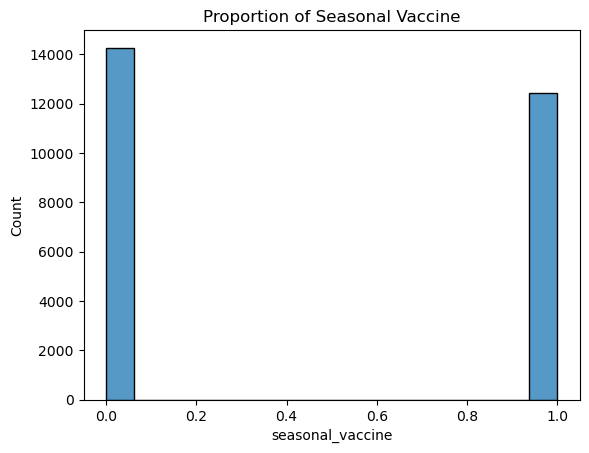

In [11]:
fig, ax1 = plt.subplots(1, 1)
ax1 = sns.histplot(joined_df['h1n1_vaccine'], palette="icefire")
ax1.set_xlabel("H1N1 Vaccine")
ax1.set_title("Proportion of H1N1 Vaccine")

fig, ax2 = plt.subplots(1, 1)

ax2= sns.histplot(joined_df["seasonal_vaccine"], palette="icefire")
ax2.set_title("Proportion of Seasonal Vaccine")


It looks like roughy half of people received the seasonal flu vaccine, but only about 20% of people received the H1N1 flu vaccine. In terms of class balance, we say that the seasonal flu vaccine target has balanced classes, but the H1N1 flu vaccine target has moderately imbalanced classes.

let's see if there are any missing values for the labels columns

In [12]:
print("H1N1 Vaccine missing values: ", joined_df.h1n1_vaccine.isnull().sum())
print("Seasonal Vaccine missing values: ", joined_df.seasonal_vaccine.isnull().sum())

H1N1 Vaccine missing values:  0
Seasonal Vaccine missing values:  0


None of the labels have missing values

# Features Exploration

Let's look at the features


In [13]:
joined_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

Let's look for missing values

In [14]:
joined_df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

There are multiple columns with missing values. Let's start assessing the numerical columns


In [15]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)
print(len(numeric_cols))

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']
23


We also added columns due to categorical columns that we transformed with OneHotEncoder.
We also filled null values with Iterative Imputer, which was a better alternative to simple imputer for our dataset. We replaced category names with frequency counts with CountEncoder for the columns which had more than 10 unique categories.
We used pipelines to make preprocessing and modelling more efficient, and also to prevent data leakage.
We also decided to split training and testing data twice so that we could have a holdout set to test our final model's generalizability at the end.

In [16]:
categorical_cols = features_df.columns[features_df.dtypes == "object"].values
print(categorical_cols)
print(len(categorical_cols))

['age_group' 'education' 'race' 'sex' 'income_poverty' 'marital_status'
 'rent_or_own' 'employment_status' 'hhs_geo_region' 'census_msa'
 'employment_industry' 'employment_occupation']
12


In [17]:
# Set up lists for each columns datatypes
num_cols = []
ohe_cols = []
freq_cols = []

for c in features_df.columns:
    if features_df[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif features_df[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [18]:
# We wanted to see each column category
print(f'Numerical Columns:', num_cols)
print('\n')
print(f'Object Columns (with less than 10 unique values):', ohe_cols)
print('\n')
print(f'Object Columns (with more than 10 unique values):', freq_cols)

Numerical Columns: ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


Object Columns (with less than 10 unique values): ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']


Object Columns (with more than 10 unique values): ['hhs_geo_region', 'employment_industry', 'employment_occupation']


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multioutput import MultiOutputRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6

# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline(steps=[
    ('simple_imputer', SimpleImputer(strategy='median')),    # Replace missing null values by SimpleImputer
    ('minmaxscaler', MinMaxScaler()),                  # Scale the numbers by StandardScaler
])

ohe_preprocessing_steps = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy = "constant", fill_value = "Unknown")),       # replace missing categories by SimpleImputer
    ('ohe_encoder', OneHotEncoder(handle_unknown= "ignore"))                             # Transform each category into a new column
#no need to scale,ohe gives binary columns

])

freq_preprocessing_steps = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)), # replace category names with frequency counts by CountEncoder
    ('freq_imputer', IterativeImputer(max_iter=100, random_state=42))            # replace missing values by IterativeImputer
])
  # no need to scale, CountEncoder(normalize=True) scales them by normalizing


# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_preprocessing_steps, num_cols),
        ("ohe", ohe_preprocessing_steps, ohe_cols),
        ('freq', freq_preprocessing_steps, freq_cols)
    ]
)

# # Package those pieces together using ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_transformer, num_cols),
#         ('ohe', ohe_transformer, ohe_cols),
#         ('freq', freq_transformer, freq_cols)
#     ])

# Modeling

Let's split our available data into a training and evaluation set. (We're going to reserve "test set" to refer to the final predictions we upload to the platform.) We'll use a third of our data for evaluation.

Recall that earlier in our exploratory analysis, the h1n1_vaccine label classes were moderately imbalanced. Sometimes this can lead to lopsided splits, which can lead to generalization problems with fitting and/or evaluating the model. We should have a large enough dataset that a randomly shuffled split should keep the same proportions, but we can use the stratify argument to enforce even splits.

# Train Test Split

In [20]:
joined_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split 
import skmultilearn
from skmultilearn.model_selection import iterative_train_test_split


RANDOM_SEED = 42

X = joined_df.drop(['seasonal_vaccine', 'h1n1_vaccine'], axis = 1)
y = joined_df[['h1n1_vaccine']]

# X_train, X_eval, y_train, y_eval = train_test_split(
#     X,
#     y,
#     test_size=0.33,
#     shuffle=True,
#     stratify=y,
#     random_state=RANDOM_SEED
# )


In [22]:
X_train, X_eval, y_train, y_eval = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [23]:
X_train.info

<bound method DataFrame.info of                h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
20417                   1.0             2.0                        0.0   
13969                   2.0             2.0                        0.0   
24930                   2.0             2.0                        0.0   
15420                   2.0             1.0                        0.0   
10998                   2.0             1.0                        0.0   
...                     ...             ...                        ...   
17823                   2.0             1.0                        0.0   
10210                   1.0             0.0                        0.0   
7737                    3.0             2.0                        0.0   
12227                   1.0             1.0                        0.0   
26118                   1.0             1.0                        0.0   

     

In [24]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21365 entries, 20417 to 26118
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   h1n1_vaccine  21365 non-null  int64
dtypes: int64(1)
memory usage: 333.8 KB


In [25]:
y_train.head()

,h1n1_vaccine
respondent_id,
20417,0
13969,0
24930,1
15420,0
10998,1


In [26]:
y_eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5342 entries, 23200 to 26674
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   h1n1_vaccine  5342 non-null   int64
dtypes: int64(1)
memory usage: 83.5 KB


In [27]:
X_eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5342 entries, 23200 to 26674
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 5326 non-null   float64
 1   h1n1_knowledge               5316 non-null   float64
 2   behavioral_antiviral_meds    5326 non-null   float64
 3   behavioral_avoidance         5296 non-null   float64
 4   behavioral_face_mask         5335 non-null   float64
 5   behavioral_wash_hands        5337 non-null   float64
 6   behavioral_large_gatherings  5331 non-null   float64
 7   behavioral_outside_home      5323 non-null   float64
 8   behavioral_touch_face        5321 non-null   float64
 9   doctor_recc_h1n1             4913 non-null   float64
 10  doctor_recc_seasonal         4913 non-null   float64
 11  chronic_med_condition        5170 non-null   float64
 12  child_under_6_months         5198 non-null   float64
 13  health_worker

In [28]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral_touch_face...
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 ['hhs_geo_region', 'employment_industry',
                                  'employment_occupation'])])

In [29]:
# Just out of curiosity, see what this looks like 
X_tr_transformed = preprocessor.transform(X_train)
X_tr_transformed.shape

(21365, 59)

In [30]:
pd.DataFrame(X_tr_transformed).isna().sum()  # we have no null values!

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
dtype: int64

In [31]:
pd.DataFrame(X_tr_transformed).head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.106717,0.341072,0.371823
1,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.076948,0.500351,0.505312
2,0.666667,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.043248,0.090662,0.066932
3,0.666667,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.116499,0.067915,0.371823
4,0.666667,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.076948,0.500351,0.505312


# Baseline Model
What does a dummy model-less prediction look like?

In [32]:
from sklearn.dummy import DummyClassifier
dummy_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(DummyClassifier(strategy="most_frequent")))
])

In [33]:
dummy_model.fit(X_train, y_train)
# Predict on evaluation set
# This competition wants probabilities, not labels
preds1 = dummy_model.predict_proba(X_eval)
preds1

[array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])]

In [34]:
print("test_probas[0].shape", preds1[0].shape)


test_probas[0].shape (5342, 2)


In [35]:
y_preds1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds1[0][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds1.shape)
y_preds1.head()

y_preds.shape: (5342, 1)


,h1n1_vaccine
respondent_id,
23200,0.0
1928,0.0
24951,0.0
20228,0.0
20206,0.0


In [36]:
# Plot ROC CUrve

In [37]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_eval, y_preds1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5000


In [38]:
### Compare the train-set and test-set accuracy
# Now, I will compare the train-set and test-set accuracy to check for overfitting.

print('Accuracy score of train data :{}'.format(dummy_model.score(X_train,y_train)))
print('Accuracy score of test data:{}'.format(dummy_model.score(X_eval,y_eval)))

Accuracy score of train data :0.7875497308682424
Accuracy score of test data:0.7875327592661925


In [39]:
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score, f1_score, accuracy_score

precision5 = precision_score(y_eval, y_preds1, average= "weighted")
recall5 = recall_score(y_eval, y_preds1, average = "weighted")
f1_score5 = f1_score(y_eval, y_preds1, average="weighted")

accuracy_score5 = accuracy_score(y_eval, y_preds1)

print("The weighted precision is: ",precision5)
print("The weighted recall is: ",recall5)
print("The accuracy score is: ", accuracy_score5)
print("The weighted f1score is: ", f1_score5)
print(" ")

print("Weighted precision, f1 score, and recall are ideal measures because the target class is imbalanced")

The weighted precision is:  0.6202078469174227
The weighted recall is:  0.7875327592661925
The accuracy score is:  0.7875327592661925
The weighted f1score is:  0.6939261322092096
 
Weighted precision, f1 score, and recall are ideal measures because the target class is imbalanced


# Logistic Regression 

In [40]:
# estimators = MultiOutputClassifier(
#     estimator=LogisticRegression(penalty="l2", C=1)
# )

# logreg = Pipeline(steps= [
#     ("preprocessor", preprocessor),
#     ("estimators", estimators),
# ])



full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

# # Setting up the logistic regression model to go through the pipeline
# logreg = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression(max_iter=500, C=1, class_weight= 'balanced', solver= 'lbfgs',           
#                                       random_state=42))
# ])

In [41]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outs...
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 LogisticRegression(max_iter=500, random_state=42))])

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
cross_validate(full_pipeline, X_train, y_train, return_train_score=True)

{'fit_time': array([1.08439851, 0.96738601, 1.05259085, 0.96741033, 0.93720794]),
 'score_time': array([0.15525913, 0.09040642, 0.05681849, 0.05321479, 0.05671573]),
 'test_score': array([0.8322022 , 0.83618067, 0.83828692, 0.83618067, 0.83430845]),
 'train_score': array([0.83740931, 0.83670723, 0.83717529, 0.83629768, 0.83659022])}

We currently do not have an overfitting problem

In [43]:
# Let's do GridSearchCV
param_grid = {
    "classifier__solver": ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
    "classifier__C": [1, 0.1, 0.1], # Regularization parameter
    "classifier__class_weight": ['balanced', None]   # we have class-imbalance issue, change the weights
}

In [44]:
grid = GridSearchCV(full_pipeline, param_grid, scoring=['f1','precision'], refit = 'f1')

In [45]:
output_logreg = grid.fit(X_train, y_train)

In [46]:

output_logreg.best_params_

{'classifier__C': 0.1,
 'classifier__class_weight': 'balanced',
 'classifier__solver': 'lbfgs'}

In [47]:
output_logreg.best_estimator_.fit(X_train, y_train)

te_preds = output_logreg.best_estimator_.predict(X_eval)
te_preds.shape

(5342,)

In [48]:
pd.DataFrame(grid.cv_results_).head()  # if you want to see the details of each combination in the grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__class_weight,param_classifier__solver,params,split0_test_f1,split1_test_f1,...,std_test_f1,rank_test_f1,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,1.131164,0.122821,0.132742,0.038210,1,balanced,lbfgs,"{'classifier__C': 1, 'classifier__class_weight...",0.573549,0.587164,...,0.005254,8,0.474711,0.484263,0.487627,0.485380,0.488266,0.484050,0.004891,21
1,0.787617,0.132842,0.125350,0.034859,1,balanced,liblinear,"{'classifier__C': 1, 'classifier__class_weight...",0.573799,0.587522,...,0.005032,7,0.475054,0.484286,0.487254,0.484672,0.488654,0.483984,0.004750,24
2,1.094376,0.129808,0.087717,0.007803,1,balanced,newton-cg,"{'classifier__C': 1, 'classifier__class_weight...",0.573549,0.587164,...,0.005254,8,0.474711,0.484263,0.487627,0.485380,0.488266,0.484050,0.004891,21
3,5.371082,0.376751,0.117857,0.047565,1,balanced,saga,"{'classifier__C': 1, 'classifier__class_weight...",0.573549,0.587164,...,0.005254,8,0.474711,0.484263,0.487627,0.485380,0.488266,0.484050,0.004891,21
4,2.521433,0.548409,0.222627,0.042113,1,None,lbfgs,"{'classifier__C': 1, 'classifier__class_weight...",0.507216,0.532086,...,0.008278,15,0.673358,0.676871,0.699083,0.689781,0.679856,0.683790,0.009401,11


In [49]:
output_logreg.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outs...
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=500, random_state=42))])

In [50]:
# from sklearn import plot_roc_curve
# plot_roc_curve(output_logreg.best_estimator_, X_eval, y_eval, name='Logistic Regression'); 

In [51]:
# evaluate(output_logreg.best_estimator_, X_train, X_eval, y_train, y_eval)
# Get code for function from repo. It brings the training and test scores

In [52]:
# Plot ROC Curve

In [53]:
# ROC - AUC SCORE
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_eval, te_preds)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7537


In [54]:
### Compare the train-set and test-set accuracy
# Now, I will compare the train-set and test-set accuracy to check for overfitting.

print('Accuracy score of train data :{}'.format(output_logreg.best_estimator_.score(X_train,y_train)))
print('Accuracy score of test data:{}'.format(output_logreg.best_estimator_.score(X_eval,y_eval)))


Accuracy score of train data :0.7792183477650363
Accuracy score of test data:0.7727442905278922


In [55]:
cross_validate(output_logreg.best_estimator_, X_train, y_train, return_train_score=True)

{'fit_time': array([0.87406278, 0.87515879, 0.9549129 , 1.08128738, 1.03729701]),
 'score_time': array([0.06608653, 0.07577515, 0.10720038, 0.13272572, 0.11229372]),
 'test_score': array([0.77252516, 0.77720571, 0.78141821, 0.77907793, 0.78001404]),
 'train_score': array([0.77989703, 0.77779078, 0.77901942, 0.77989703, 0.78036508])}

In [56]:
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score, f1_score, accuracy_score

precision5 = precision_score(y_eval, y_preds1, average= "weighted")
recall5 = recall_score(y_eval, y_preds1, average = "weighted")
f1_score5 = f1_score(y_eval, y_preds1, average="weighted")

accuracy_score5 = accuracy_score(y_eval, y_preds1)

print("The weighted precision is: ",precision5)
print("The weighted recall is: ",recall5)
print("The accuracy score is: ", accuracy_score5)
print("The weighted f1score is: ", f1_score5)
print(" ")

print("Weighted precision, f1 score, and recall are ideal measures because the target class is imbalanced")

The weighted precision is:  0.6202078469174227
The weighted recall is:  0.7875327592661925
The accuracy score is:  0.7875327592661925
The weighted f1score is:  0.6939261322092096
 
Weighted precision, f1 score, and recall are ideal measures because the target class is imbalanced


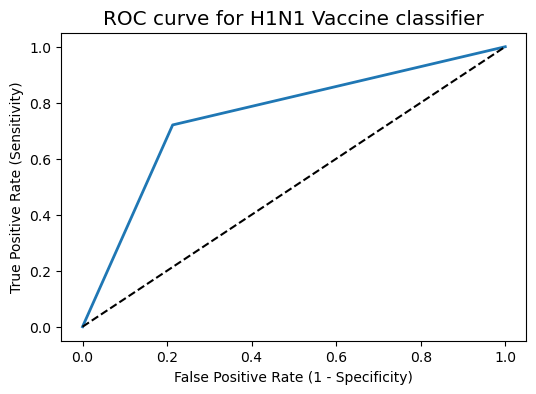

In [57]:
# import sklearn.metrics
# from sklearn.metrics import plot_roc_curve
# plot_roc_curve(output_logreg.best_estimator_, X_eval, y_eval, name='logistic regression');


from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_eval, te_preds)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for H1N1 Vaccine classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [58]:
def plot_roc(y_true, y_score, label_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

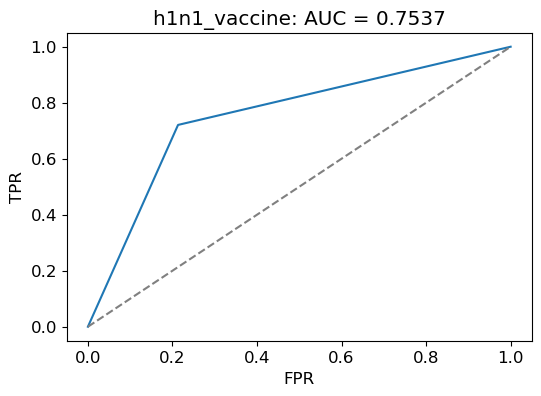

In [59]:
plt.figure(figsize=(6,4))

plot_roc(
    y_eval, te_preds, 'h1n1_vaccine'
)

In [60]:
roc_auc_score(y_eval, te_preds)

0.7537443886788225

# Decision Tree

In [61]:
# ROC - AUC SCORE
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_eval, te_preds)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7537


In [62]:
### Compare the train-set and test-set accuracy
# Now, I will compare the train-set and test-set accuracy to check for overfitting.

print('Accuracy score of train data :{}'.format(output_logreg.best_estimator_.score(X_train,y_train)))
print('Accuracy score of test data:{}'.format(output_logreg.best_estimator_.score(X_eval,y_eval)))


Accuracy score of train data :0.7792183477650363
Accuracy score of test data:0.7727442905278922


In [63]:
cross_validate(output_logreg.best_estimator_, X_train, y_train, return_train_score=True)

{'fit_time': array([1.03152871, 0.89185572, 0.93148565, 0.68495655, 0.87183118]),
 'score_time': array([0.12909317, 0.0974834 , 0.10798025, 0.07983065, 0.05959916]),
 'test_score': array([0.77252516, 0.77720571, 0.78141821, 0.77907793, 0.78001404]),
 'train_score': array([0.77989703, 0.77779078, 0.77901942, 0.77989703, 0.78036508])}

In [64]:
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score, f1_score, accuracy_score

precision5 = precision_score(y_eval, y_preds1, average= "weighted")
recall5 = recall_score(y_eval, y_preds1, average = "weighted")
f1_score5 = f1_score(y_eval, y_preds1, average="weighted")

accuracy_score5 = accuracy_score(y_eval, y_preds1)

print("The weighted precision is: ",precision5)
print("The weighted recall is: ",recall5)
print("The accuracy score is: ", accuracy_score5)
print("The weighted f1score is: ", f1_score5)
print(" ")

print("Weighted precision, f1 score, and recall are ideal measures because the target class is imbalanced")

The weighted precision is:  0.6202078469174227
The weighted recall is:  0.7875327592661925
The accuracy score is:  0.7875327592661925
The weighted f1score is:  0.6939261322092096
 
Weighted precision, f1 score, and recall are ideal measures because the target class is imbalanced


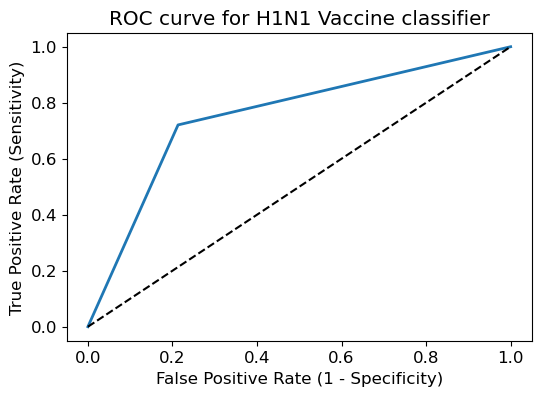

In [65]:
# import sklearn.metrics
# from sklearn.metrics import plot_roc_curve
# plot_roc_curve(output_logreg.best_estimator_, X_eval, y_eval, name='logistic regression');


from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_eval, te_preds)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for H1N1 Vaccine classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [66]:
def plot_roc(y_true, y_score, label_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

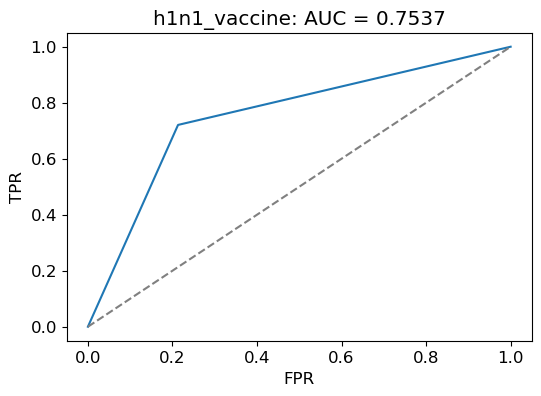

In [67]:
plt.figure(figsize=(6,4))

plot_roc(
    y_eval, te_preds, 'h1n1_vaccine'
)

In [68]:
roc_auc_score(y_eval, te_preds)

0.7537443886788225

# Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
full_pipeline_dt = Pipeline(steps=[
    ("preprocessor", preprocessor), 
    ("classifier", DecisionTreeClassifier(random_state=42))

])

In [70]:
cross_validate(full_pipeline_dt, X_train, y_train, return_train_score=True)

{'fit_time': array([0.83491778, 0.69089174, 0.65308809, 0.71447086, 0.64147615]),
 'score_time': array([0.05111647, 0.05717659, 0.09162283, 0.05845308, 0.06333089]),
 'test_score': array([0.75871753, 0.75778142, 0.74444184, 0.74818629, 0.75450503]),
 'train_score': array([1., 1., 1., 1., 1.])}

We definitely have an overfitting problem with DecisionTreeClassifier

In [71]:
params_grid_dt = {
    "classifier__criterion": ['gini', 'entropy'],
    "classifier__max_depth": range(1,2, 5),
    "classifier__min_samples_split": range(2,10),
    "classifier__class_weight": ['balanced', None]
}

In [72]:
grid_dt = GridSearchCV(full_pipeline_dt, params_grid_dt, scoring = ['f1', 'precision'], refit = 'f1')

In [73]:
output_dt= grid_dt.fit(X_train, y_train)

In [74]:
output_dt.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'gini',
 'classifier__max_depth': 1,
 'classifier__min_samples_split': 2}

In [75]:
output_dt.best_estimator_.fit(X_train, y_train)

dt_preds = output_dt.best_estimator_.predict(X_eval)

In [76]:
# Plot ROC Curve

In [77]:
# ROC - AUC SCORE
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_eval, dt_preds)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7085


In [78]:
### Compare the train-set and test-set accuracy
# Now, I will compare the train-set and test-set accuracy to check for overfitting.

print('Accuracy score of train data :{}'.format(output_dt.best_estimator_.score(X_train,y_train)))
print('Accuracy score of test data:{}'.format(output_dt.best_estimator_.score(X_eval,y_eval)))


Accuracy score of train data :0.7987362508776036
Accuracy score of test data:0.8083114938225384


In [79]:
cross_validate(output_dt.best_estimator_, X_train, y_train, return_train_score=True)

{'fit_time': array([0.48161316, 0.39584684, 0.38438392, 0.4056592 , 0.36204457]),
 'score_time': array([0.07341409, 0.08319259, 0.0553422 , 0.0651648 , 0.07415247]),
 'test_score': array([0.79639597, 0.79990639, 0.79990639, 0.79452375, 0.80294875]),
 'train_score': array([0.79932132, 0.79844372, 0.79844372, 0.79978938, 0.79768313])}

In [80]:
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score, f1_score, accuracy_score

precision5 = precision_score(y_eval, dt_preds)
recall5 = recall_score(y_eval, dt_preds)
f1_score5 = f1_score(y_eval, dt_preds)

accuracy_score5 = accuracy_score(y_eval, dt_preds)

print("Precision is: ",precision5)
print("Recall is: ",recall5)
print("Accuracy score is: ", accuracy_score5)
print("F1score is: ", f1_score5)
print(" ")


Precision is:  0.5503173164097914
Recall is:  0.5348017621145374
Accuracy score is:  0.8083114938225384
F1score is:  0.5424486148346737
 


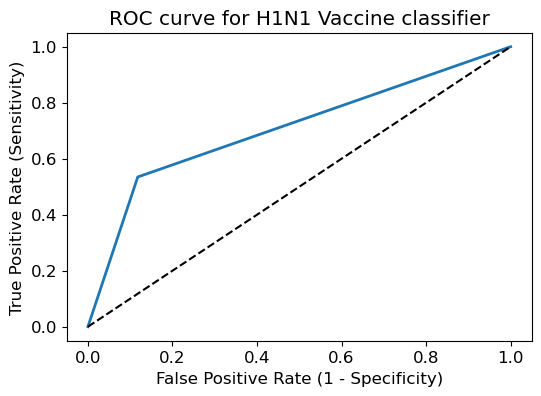

In [81]:
# import sklearn.metrics
# from sklearn.metrics import plot_roc_curve
# plot_roc_curve(output_logreg.best_estimator_, X_eval, y_eval, name='logistic regression');


from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_eval, dt_preds)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for H1N1 Vaccine classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [82]:
def plot_roc(y_true, y_score, label_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

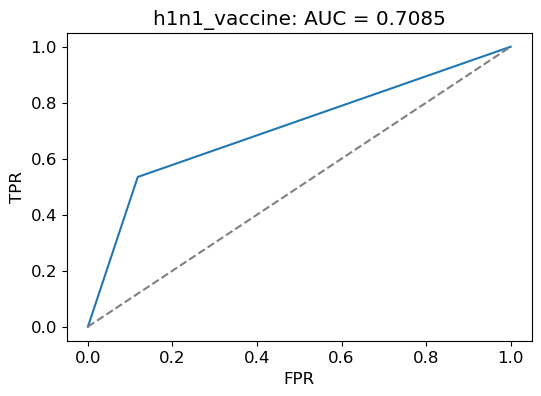

In [83]:
plt.figure(figsize=(6,4))

plot_roc(
    y_eval, dt_preds, 'h1n1_vaccine'
)

In [84]:
roc_auc_score(y_eval, dt_preds)


0.7084515109598122

In [85]:
output_dt.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outs...
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=1,
                                        random_state=42))])

In [86]:
from sklearn.metrics import roc_curve, auc
auc(fpr, tpr)
# # Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# # for various decision boundaries given the case member probabilites

# # First calculate the probability scores of each of the datapoints:
# y_score = output_dt.best_estimator_.fit(X_train, y_train).decision_function(X_eval)

# fpr, tpr, thresholds = roc_curve(y_eval, y_score)

0.7084515109598122

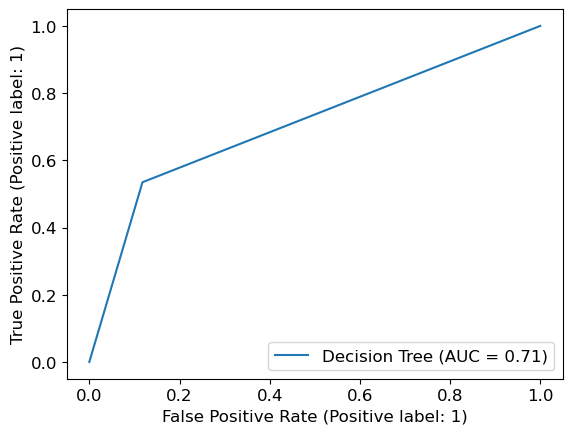

In [96]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(output_dt.best_estimator_, X_eval, y_eval, name="Decision Tree");
# from scikitplot.metrics import plot_roc_curve
# plot_roc_curve(output_dt.best_estimator_, X_eval, y_eval);


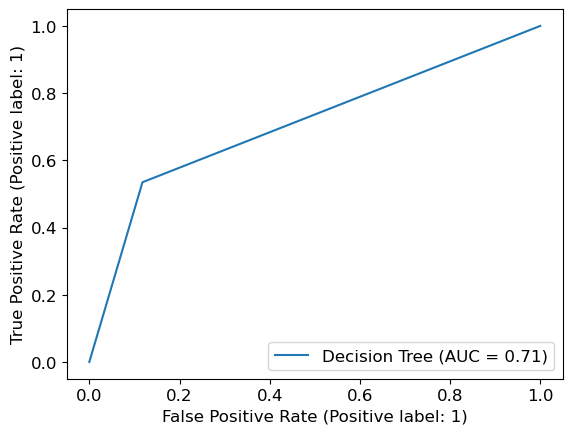

In [100]:
RocCurveDisplay.from_predictions(y_eval, dt_preds, sample_weight=None, drop_intermediate=True, pos_label=None, name="Decision Tree", ax=None, plot_chance_level=False, chance_level_kw=None,)


# Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

In [337]:
cross_validate(rfc, X_train, y_train, return_train_score=True)

{'fit_time': array([6.55459166, 5.56163311, 5.17207074, 5.74451113, 7.56130052]),
 'score_time': array([0.19952059, 0.23337102, 0.18723917, 0.22240806, 0.38108015]),
 'test_score': array([0.8296279 , 0.83243623, 0.83571261, 0.83969108, 0.83056401]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [101]:
# Let's do GridSearchCV
param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth" : [2, 5], 
    "classifier__min_samples_leaf": [1, 2],
    "classifier__class_weight" :['balanced', 'balanced_subsample']  
    # class weight should be balanced or balanced_subsample - we have imbalance issue.
}

# we have 3*3*3*2 = 54 many random forest models to run!

In [104]:

grid = GridSearchCV(rfc, param_grid, scoring=['f1','precision'], refit = 'f1')

In [105]:
output_rfc = grid.fit(X_train, y_train)

In [106]:

output_rfc.best_params_

{'classifier__class_weight': 'balanced_subsample',
 'classifier__max_depth': 5,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 100}

In [107]:
output_rfc.best_estimator_.fit(X_train, y_train)

rfc_preds = output_rfc.best_estimator_.predict(X_eval)

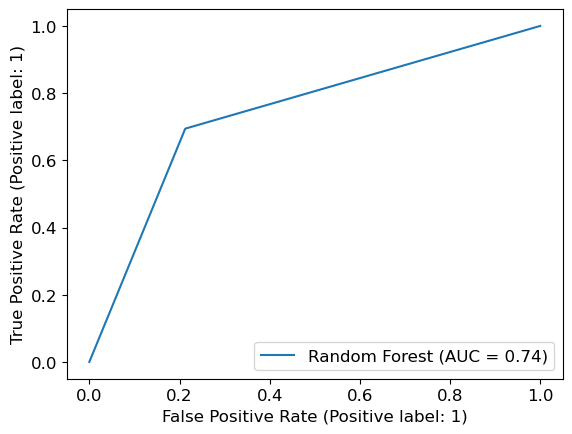

In [109]:
RocCurveDisplay.from_predictions(y_eval, rfc_preds, sample_weight=None, drop_intermediate=True, pos_label=None, name="Random Forest", ax=None, plot_chance_level=False, chance_level_kw=None,);

# KNN Classfifier

In [110]:
from sklearn.neighbors import KNeighborsClassifier
kNN = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])

In [111]:
cross_validate(kNN, X_train, y_train, return_train_score=True)

{'fit_time': array([0.3682313 , 0.24981904, 0.51376677, 0.28881192, 0.26983833]),
 'score_time': array([1.03445363, 0.55861497, 0.95232415, 0.55809689, 0.60052729]),
 'test_score': array([0.8008425 , 0.80248069, 0.80131055, 0.79592792, 0.80154458]),
 'train_score': array([0.84548327, 0.84595132, 0.84770653, 0.84612684, 0.84554177])}

In [ ]:
# Let's do GridSearchCV
param_grid = {
    "classifier__n_neighbors",: [1, 5, 10],
    "classifier__p" : [1, 2, 3], 
    "classifier__min_samples_leaf": [1, 2],
    "classifier__weights" :[]  
    # class weight should be balanced or balanced_subsample - we have imbalance issue.
}


In [ ]:
KNeighborsClassifier()